## Importing the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('MNIST_784')


In [3]:
X=mnist.data
y=mnist.target
print(X.shape)
print(y.shape)
y.head()

(70000, 784)
(70000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

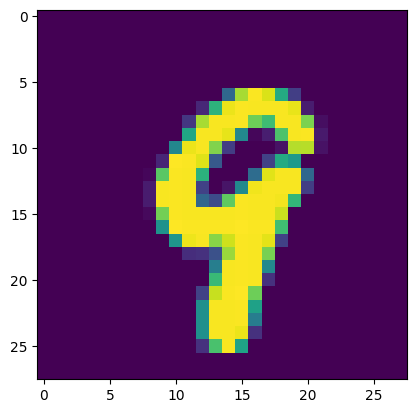

Val should be:  9


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

rand=X.iloc[6969].to_numpy()
img=rand.reshape(28,28)
plt.imshow(img)
plt.show()
print("Val should be: ",y[6969])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42, stratify=y)
X_train.shape

(60000, 784)

## Training a Binary Classifier

In [6]:
# The binary classifier can only give negative or positive outcomes
y_train_5 = (y_train == '5') # True for all 5s
y_test_5 = (y_test == '5')
y_train_5.value_counts(False)

class
False    54589
True      5411
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_5)

## Measuring Performance of the Binary Classifier

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy").mean()

0.9664

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54052,   537],
       [ 1479,  3932]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8798388901320205
0.7266678987248198


In [12]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7959514170040486

In [13]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [14]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

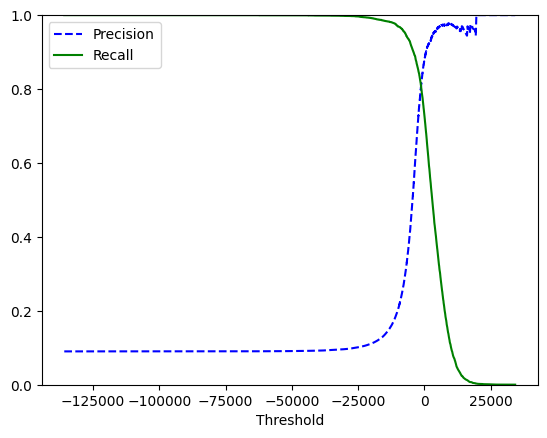

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [16]:
y_train_pred_90 = (y_scores > 600)
print(precision_score(y_train_5, y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)

0.9006832601268911


0.6821289964886342

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

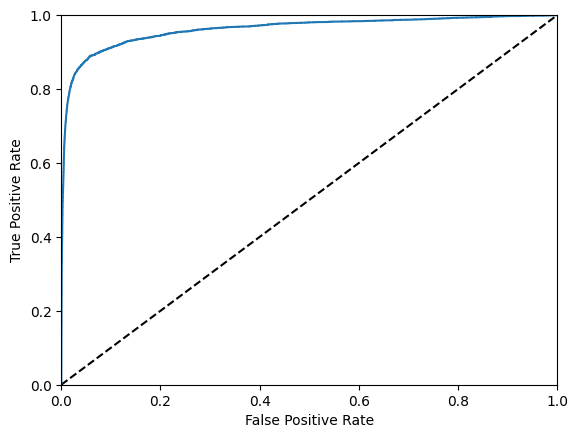

In [18]:
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


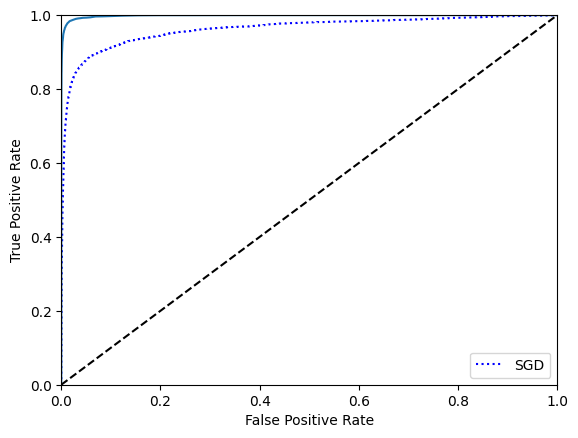

In [20]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest)
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)

0.9985559704722996

In [22]:
# precision = precision_score(y_train_5, y_scores_forest)
# print(precision)


In [23]:
y_pred_forest = (y_scores_forest > 0.5)
print(precision_score(y_train_5, y_pred_forest))
print(recall_score(y_train_5, y_pred_forest))

0.9906917706790777
0.8654592496765847


# MultiClass Classification

In [24]:
sgd_clf.fit(X_train, y_train) 
sgd_clf.predict(X_train.iloc[[6969]])

array(['4'], dtype='<U1')

In [25]:
y_train.iloc[6969]

'4'

In [26]:
# import joblib
# sgdfile = 'finalized_model.sav'
# joblib.dump(sgd_clf, sgdfile)

In [27]:
sgd_clf.decision_function(X_train.iloc[[6969]])

array([[-27575.60874259, -19745.33830596, -27845.9926194 ,
         -8213.57572214,   5265.91837771, -23611.26296264,
        -39951.29152886,  -1301.04799206, -18514.08480777,
         -9155.51048284]])

In [28]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict(X_train.iloc[[6969]])


array(['4'], dtype=object)

In [29]:
len(ovo_clf.estimators_)

45

In [30]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.8709 , 0.88845, 0.8838 ])

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9027 , 0.9018 , 0.89965])

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5604,    0,   16,    4,    6,   42,   35,    6,  203,    1],
       [   1, 6427,   42,   24,    4,   42,    6,    5,  190,   11],
       [  23,   27, 5294,   76,   76,   27,   62,   35,  357,   14],
       [  26,   15,  115, 5258,    1,  197,   27,   41,  372,   69],
       [   9,   14,   49,    6, 5249,   10,   33,   19,  302,  158],
       [  34,   17,   37,  149,   58, 4467,   86,   18,  479,   66],
       [  26,   21,   60,    1,   48,   96, 5497,    6,  138,    1],
       [  18,   11,   60,   28,   48,   14,    4, 5691,  159,  218],
       [  21,   62,   44,   82,    5,  121,   33,    9, 5429,   44],
       [  27,   16,   26,   57,  137,   38,    1,  177,  318, 5167]],
      dtype=int64)

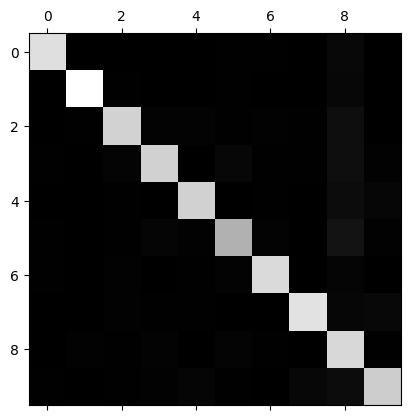

In [39]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [40]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

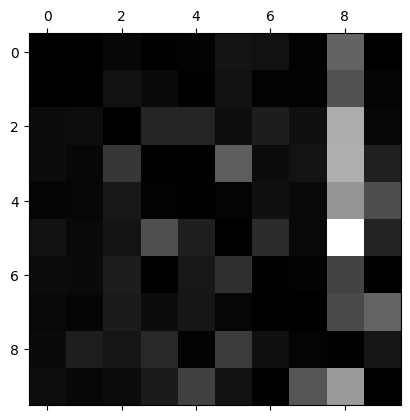

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()